<img src='感知器数据分类算法步骤.jpg' width='400px' height='400px' style='float:left'></img>
<img src='步调函数与阈值.jpg' width='400px' height='400px' style='float:left;margin-top:0px'></img>
<img src='权重更新算法.jpg' width='400px' height='400px' style='float:left'></img>
<img src='权重更新算法示例.jpg' width='400px' height='400px' style='float:left'></img>
<img src='权重更新算法示例1.jpg' width='400px' height='400px' style='float:left'></img>
<img src='权重更新算法示例2.jpg' width='400px' height='400px' style='float:left'></img>
<img src='算法步骤总结.jpg' width='400px' height='400px' style='float:left'></img>

In [1]:
import numpy as np

class Perceptron(object):
    '''
    eta:学习率
    n_iter:权重向量的训练次数
    w_:神经分叉权重向量
    errors:用于记录神经元判断出错次数
    '''
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        pass
    
    def fit(self, X, y):
        '''
        输入训练数据， 培训神经元， X输入样本向量， y对应样本分类
        
        X:shape[n_samples, n_features]
        X:[[1, 2, 3], [4, 5, 6]]
        n_samples:2
        n_features:3
        
        y:[1, -1]
        '''
        """
        初始化权重向量为0
        加1是因为前面算法提到的w0, 也就是步调函数阈值，其实也就是偏置
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                """
                update = n * (y - y')
                """
                update = self.eta * (target - self.predict(xi))
                """
                xi 是一个向量
                """
                self.w_[1:] += update * xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
                self.errors_.append(errors)
                pass
            pass
        
    def net_input(self, X):
        """
        z = W0*1 + W1*X1 + W2*X2 + ... Wn*Xn
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    pass
        
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    pass
    pass

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('iris.data.csv', header=None)
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
import matplotlib.pyplot as plt

In [5]:
y = df.loc[0:100, 4].values
y = np.where( y == 'Iris-setosa', -1, 1)

X = df.loc[0:100, [0, 2]].values

In [6]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('花瓣的长度')
plt.ylabel('花径的长度')
plt.legend(loc='upper left')

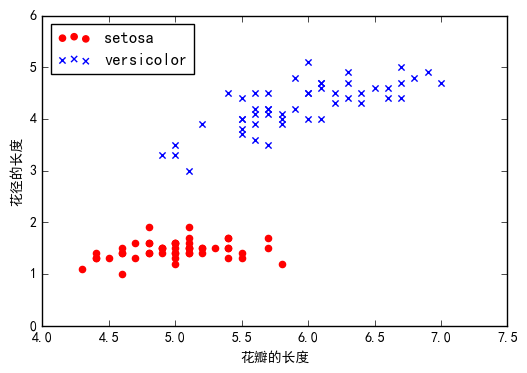

In [7]:
plt.show()

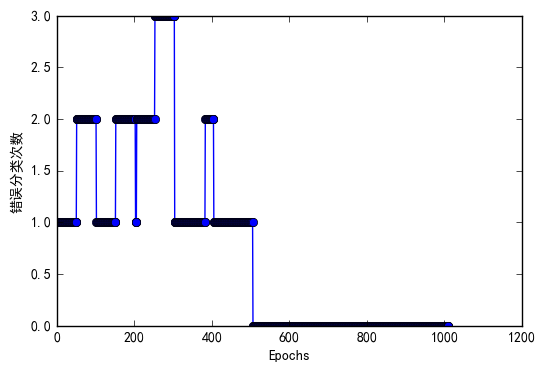

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('错误分类次数')
plt.show()

In [9]:
from matplotlib.colors import ListedColormap

In [58]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for inx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(inx),
                   marker=markers[inx], label=cl)

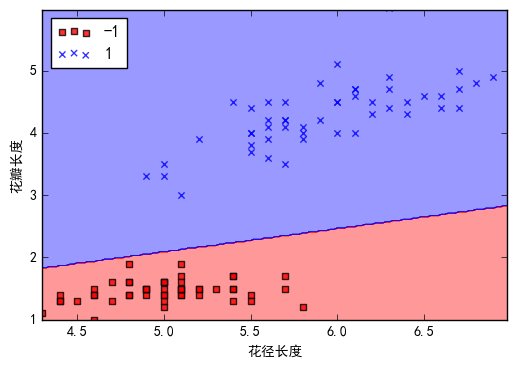

In [59]:
plot_decision_regions(X, y, ppn, resolution=0.02)

plt.xlabel('花径长度')
plt.ylabel('花瓣长度')
plt.legend(loc='upper left')
plt.show()

<div style='font-size:30px'>自适应线性神经元</div>

<img src='自适应线性神经元.jpg' width='400px' height='400px' style='float:left'></img>
<img src='距离的定义.jpg' width='400px' height='400px' style='float:left;margin-top:0px'></img>
<img src='渐进下降法.jpg' width='400px' height='400px' style='float:left'></img>
<img src='和方差求偏导数.jpg' width='400px' height='400px' style='float:left'></img>
<img src='神经元参数的更新.jpg' width='400px' height='400px' style='float:left'></img>

In [166]:
class AdalineGD(object):
    """
    eta:float
    学习效率，处于0和1
    
    n_iter:int
    对训练数据进行学习改进次数
    
    w_:一维向量
    存储权重数值
    
    error_:
    存储每次迭代改进时，网络对数据进行错误判断的次数
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """
        X:二维数组[n_samples, n_features]
        n_samples 表示X中含有训练数据条目数
        n_features 含有4个数据的一维向量，用于表示一条训练数目
        
        y:一维向量
        用于存储每一训练条目对应的正确分类
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0, 1, -1 )

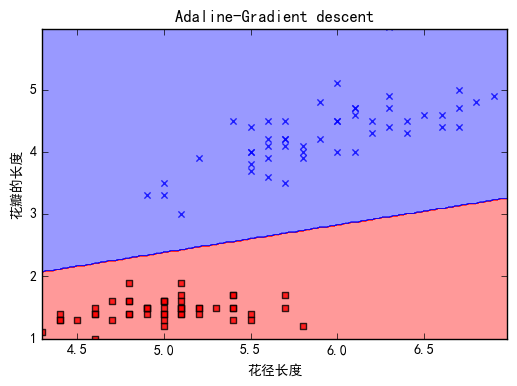

In [170]:
ada = AdalineGD(eta=0.0001, n_iter=50)
ada.fit(X, y)
plot_decision_regions(X, y, classifier=ada, resolution=0.02)
plt.title('Adaline-Gradient descent')
plt.xlabel('花径长度')
plt.ylabel('花瓣的长度')
plt.show()

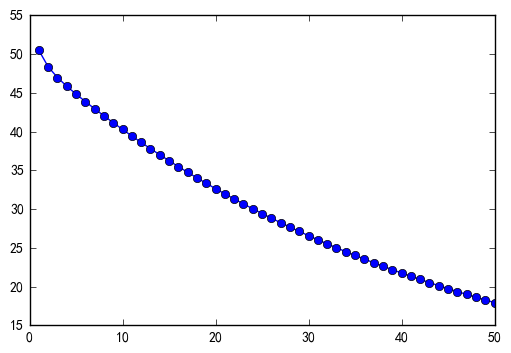

In [175]:
plt.plot(range(1, 51), ada.cost_, marker='o')
plt.show()